<a href="https://colab.research.google.com/github/liam-haas/CLPS0950_FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install rdkit-pypi

In [2]:
from rdkit import Chem
from rdkit.Chem import *
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

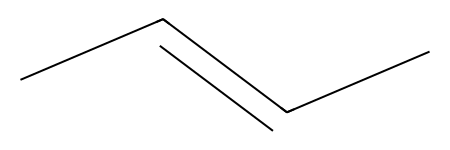

In [4]:
Chem.MolFromSmiles('CC=CC')